# Aula 05: Modelo de Regressão e Machine Learning

Nessa aula discutiremos o que é o processo de classificação e como as máquinas podem aprender esse processo. Após essa discussão iniciaremos o tratamento dos dados para criar nosso primeiro modelo de ML.

A primeira coisa que devemos fazer é separar os dados que vamos usar como entrada do nosso modelo, dos que precisamos prever:

In [2]:
import pandas as pd

In [3]:
# Aula 04

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)

colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [0]:
x = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


Vamos usar as notas das provas de ciências naturais, ciências humanas, matemática e redação para prever as notas da prova de linguagem e códigos. 

Como separamos os dados de entrada, também devemos fazer o mesmo com aqueles que precisamos adivinhar.

In [0]:
y = dados_notas['linguagem_codigo']
y

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

Agora temos os dados que precisamos classificar, mas repare que essa é toda nossa informação! Se eu treinar um modelo com todos esses dados, como eu vou conseguir medir a qualidade do modelo? 

Por isso precisamos dividir nossos dados em dois grupos, um para treino e outro para teste.

Para fazer isso vamos usar métodos da biblioteca Scikit-learn, ela é uma das principais ferramentas no mundo do Machine Learning! Vale conferir e estudar um pouco mais sobre ela, aqui está o [link para a documentação](https://scikit-learn.org/stable/).

Além do Sklearn, iremos utilizar o numpy para setar o seed dos números pseudo-aleatórios.

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [0]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
25012,610.20,651.90,741.40,660.00
52044,571.70,639.60,639.10,680.00
86543,385.90,569.10,502.00,360.00
36362,424.70,446.20,589.80,420.00
96734,831.40,850.40,943.20,940.00


Feita a divisão dos nossos dados, chegou a hora de criar seu primeiro modelo de Regressão.
Vamos utilizar o LinearSVR do scikit-learn:

In [0]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Até o momento nós treinamos o modelo apenas com o `.fit()`, mas falta fazer a predição dos resultados. Para realizar a predição chamamos o método `.predict()` do **modelo**.

In [0]:
predicoes_notas_linguagem = modelo.predict(x_teste)
predicoes_notas_linguagem[:5]

array([591.30581763, 606.46025242, 639.89298788, 555.97651583,
       472.52000416])

In [0]:
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64

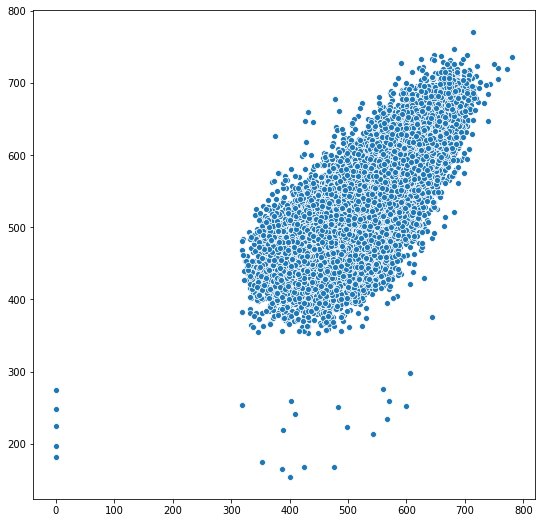

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

Vamos criar mais um modelo de **machine learning** basededo em "árvores":

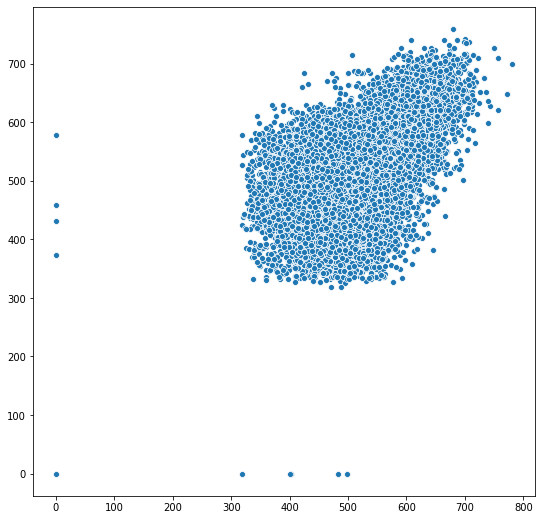

In [0]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

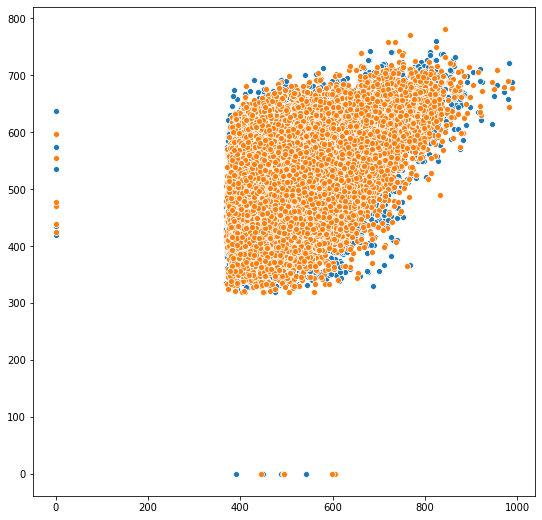

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

Após treinar o modelo e fazer as predições, plotamos duas imagens. A primeira é muito parecida com as os gráficos do primeiro classificador, mas a segunda mostra os valores reais e valores previstos!

Essa figura é muito interessante e mostra uma sobreposição muito boa entre elas, indicando que nossos resultados fazem sentido.

Avaliar os modelos por imagens é uma forma relevante, mas não resume a informação muito bem, por isso ficaria complexo avaliar dois ou três modelos apenas com gráficos.

O que precisamos agora é de uma métrica capaz de nos dizer como nosso modelo está indo, aqui vamos usar o [erro quadrático médio](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio). Existem centenas de métricas de avaliação, tudo vai depender do que você precisa e o que você está prevendo. 

In [0]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, predicoes_notas_linguagem)

4186.22

Veja que nosso erro quadrático médio deu em torno dos 4186.22. Embora pelo gráfico nosso modelo pareça muito bom, pela métrica parece ser um pouco alto.

O MSE, sigla em inglês para essá métrica, é uma medida que quanto mais perto de zero melhor.

Com isso, encerramos nossa última aula. Espero que vocês tenham gostado! 

## Desafio 1 da [Allan Spadini](https://twitter.com/allanspadini)

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Use a média das notas das 4 provas como input do input e plote um gráfico com a previsão e valores reais (Igual ao gráfico sugerido pelo Allan em aula)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Remover as notas zero e testar os mesmos modelos, comparando o resultado

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Interpretar tudo que foi feito e compartilhar suas conclusões

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.